<a href="https://colab.research.google.com/github/Prem0307/113/blob/main/data_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load=files.upload()


Saving saving_data_final.csv to saving_data_final.csv


In [3]:
import pandas as pd
import statistics
import plotly.express as ps
df=pd.read_csv("saving_data_final.csv")
fig=ps.scatter(df,y="quant_saved",color="wealthy")
fig.show()

In [4]:
import csv
with open("saving_data_final.csv")as f:
  reader=csv.reader(f)
  saving_data=list(reader)
saving_data.pop(0)
total_entries=len(saving_data)
total_people_reminded=0
for data in saving_data:
  if int(data[3])==1:
    total_people_reminded+=1
print(total_people_reminded)
import plotly.graph_objects as go 
fig=go.Figure(go.Bar(x=["reminded","not reminded"],y=[total_people_reminded,(total_entries-total_people_reminded)]))
fig.show()

2992


In [5]:
all_savings=[]
for data in saving_data:
  all_savings.append(float(data[0]))
print(f'mean of savings-{statistics.mean(all_savings)}')
print(f'median of savings-{statistics.median(all_savings)}')
print(f'mode of savings-{statistics.mode(all_savings)}')


mean of savings-85.32780331328739
median of savings-39.2724
mode of savings-0.0


In [6]:
reminded_saving=[]
not_reminded_saving=[]
for data in saving_data:
  if int(data[3])==1:
    reminded_saving.append(float(data[0]))
  else:
    not_reminded_saving.append(float(data[0]))
print(f'mean of reminded savings-{statistics.mean(reminded_saving)}')
print(f'median of reminded savings-{statistics.median(reminded_saving)}')
print(f'mode of reminded savings-{statistics.mode(reminded_saving)}')
print("\n\n")
print(f'mean of not reminded savings-{statistics.mean(not_reminded_saving)}')
print(f'median of not reminded savings-{statistics.median(not_reminded_saving)}')
print(f'mode of not reminded savings-{statistics.mode(not_reminded_saving)}')

mean of reminded savings-78.61157672384391
median of reminded savings-39.2724
mode of reminded savings-2.284



mean of not reminded savings-87.22929365730847
median of not reminded savings-39.2724
mode of not reminded savings-0.0


In [7]:
print(f'standard deviation of all data {statistics.stdev(all_savings)}')
print(f'standard deviation of reminded data {statistics.stdev(reminded_saving)}')
print(f'standard deviation of not reminded data {statistics.stdev(not_reminded_saving)}')

standard deviation of all data 196.75453011909315
standard deviation of reminded data 164.58072141099734
standard deviation of not reminded data 204.91519933877308


In [14]:
import plotly.figure_factory as ff
fig=ff.create_distplot([df["quant_saved"].to_list()],['savings'],show_hist=False)
fig.show()

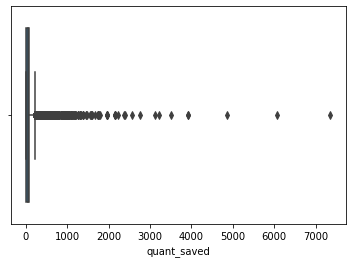

In [15]:
import seaborn as sns 
sns.boxplot(data=df,x=df["quant_saved"])

In [16]:
q1=df['quant_saved'].quantile(0.25)
q2=df['quant_saved'].quantile(0.75)
iqr=q2-q1
print(f'q1-{q1}')
print(f'q2-{q2}')
print(f'iqr-{iqr}')
lower_visk=q1-1.5*iqr
upper_visk=q2+1.5*iqr
print(f'lower_visk{lower_visk}')
print(f'upper_visk{upper_visk}')
newdf=df[df['quant_saved']<upper_visk]

q1-2.2840000000000003
q2-86.514
iqr-84.22999999999999
lower_visk-124.06099999999998
upper_visk212.85899999999998


In [17]:
all_savings=newdf['quant_saved'].tolist()

print(f'mean of reminded savings-{statistics.mean(all_savings)}')
print(f'median of reminded savings-{statistics.median(all_savings)}')
print(f'mode of reminded savings-{statistics.mode(all_savings)}')
print(f'stddev of reminded savings-{statistics.stdev(all_savings)}')
fig=ff.create_distplot([newdf['quant_saved'].tolist()],['savings'],show_hist=False)
fig.show()

mean of reminded savings-46.200519389818794
median of reminded savings-36.0475
mode of reminded savings-0.0
stddev of reminded savings-50.866871917288634


In [18]:
import random
sampling_mean=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean.append(statistics.mean(temp_list))
mean_sampling=statistics.mean(sampling_mean)
fig=ff.create_distplot([sampling_mean],['savings of sampling'],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode='lines',name='mean'))
fig.show()

In [ ]:
print(f'standard deviation of reminded savings-{statistics.stdev(sampling_mean)}')

In [19]:
print(f'mean of reminded savings-{(mean_sampling)}')
print(f'mean of reminded savings-{statistics.mean(all_savings)}')

mean of reminded savings-45.9803056335708
mean of reminded savings-46.200519389818794
